## Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## Dataset

In [3]:
train_df=pd.read_csv('train.csv', sep=';')
test_df=pd.read_csv('test.csv', sep=';')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   att1                   1200 non-null   int64  
 1   date                   1200 non-null   object 
 2   quarter                1200 non-null   object 
 3   department             1200 non-null   object 
 4   day                    1200 non-null   object 
 5   team                   1200 non-null   int64  
 6   targeted_productivity  1200 non-null   float64
 7   smv                    1200 non-null   float64
 8   wip                    1200 non-null   float64
 9   over_time              1200 non-null   float64
 10  hsu                    1200 non-null   float64
 11  incentive              1200 non-null   float64
 12  idle_time              1200 non-null   float64
 13  idle_men               1200 non-null   float64
 14  no_of_style_change     1200 non-null   float64
 15  no_o

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   att1                   310 non-null    int64  
 1   date                   310 non-null    object 
 2   quarter                310 non-null    object 
 3   department             310 non-null    object 
 4   day                    310 non-null    object 
 5   team                   310 non-null    int64  
 6   targeted_productivity  310 non-null    float64
 7   smv                    310 non-null    float64
 8   wip                    310 non-null    float64
 9   over_time              310 non-null    float64
 10  hsu                    310 non-null    float64
 11  incentive              310 non-null    float64
 12  idle_time              310 non-null    float64
 13  idle_men               310 non-null    float64
 14  no_of_style_change     310 non-null    float64
 15  no_of_

In [6]:
train_df.head()

,att1,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,...,idle_time,idle_men,no_of_style_change,no_of_workers,work_cond_f1,work_cond_f2,work_cond_f3,work_cond_f4,work_cond_f5,actual_productivity
0,0,1/10/15 12:00 AM,Quarter2,sweing,Saturday,8,0.80,25.90,1158.000000,10170.0,...,0.0,0.0,0.0,56.5,0.119212,30.610905,857.991517,30.730117,858.110729,0.850137
1,1,1/18/15 12:00 AM,Quarter3,finishing,Sunday,5,0.60,4.15,1186.417034,1440.0,...,0.0,0.0,0.0,8.0,0.952555,50.583406,908.620600,51.535961,909.573155,0.852794
2,2,1/25/15 12:00 AM,Quarter4,sweing,Sunday,6,0.80,11.61,1181.000000,5760.0,...,0.0,0.0,0.0,32.0,0.032391,56.541016,924.957150,56.573407,924.989541,0.800386
3,3,3/11/15 12:00 AM,Quarter2,sweing,Wednesday,1,0.75,26.82,1322.000000,7080.0,...,0.0,0.0,0.0,59.0,0.939783,34.392848,833.065850,35.332631,834.005633,0.750051
4,4,2/17/15 12:00 AM,Quarter3,finishing,Tuesday,3,0.50,5.13,1186.417034,1800.0,...,0.0,0.0,0.0,15.0,0.257289,30.695846,818.412898,30.953135,818.670186,0.786600


In [7]:
test_df.head()

,att1,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,...,idle_time,idle_men,no_of_style_change,no_of_workers,work_cond_f1,work_cond_f2,work_cond_f3,work_cond_f4,work_cond_f5,actual_productivity
0,1200,1/1/15 12:00 AM,Quarter1,sweing,Thursday,2,0.75,19.87,733.000000,6000.0,...,0.0,0.0,0.0,55.0,0.575666,44.468310,868.126938,45.043976,868.702604,0.753098
1,1201,1/4/15 12:00 AM,Quarter1,sweing,Sunday,7,0.80,25.90,1227.000000,7020.0,...,0.0,0.0,0.0,56.5,0.130807,51.421243,883.229799,51.552050,883.360606,0.850436
2,1202,2/25/15 12:00 AM,Quarter4,sweing,Wednesday,8,0.70,29.40,847.000000,6960.0,...,0.0,0.0,1.0,58.0,0.788872,50.806533,897.431373,51.595405,898.220246,0.700362
3,1203,1/14/15 12:00 AM,Quarter2,sweing,Wednesday,14,0.80,51.02,1086.000000,4260.0,...,0.0,0.0,0.0,57.0,0.811034,51.319921,872.498517,52.130955,873.309551,0.077802
4,1204,3/10/15 12:00 AM,Quarter2,finishing,Tuesday,10,0.70,2.90,1402.988827,960.0,...,0.0,0.0,0.0,8.0,0.084029,42.533250,950.851938,42.617279,950.935967,0.398750


In [8]:
train_df.nunique()

att1                     1200
date                       59
quarter                     5
department                  3
day                         6
team                       14
targeted_productivity       9
smv                        67
wip                       475
over_time                 133
hsu                       593
incentive                  46
idle_time                  13
idle_men                   10
no_of_style_change          4
no_of_workers              64
work_cond_f1              997
work_cond_f2              997
work_cond_f3              997
work_cond_f4              997
work_cond_f5              997
actual_productivity       860
dtype: int64

In [9]:
def cin_subsample(df, cin):
    selecton_vector = np.arange(0, len(df), (cin % 100) // 4)
    return df.iloc[selecton_vector]

In [10]:
subsample_data = cin_subsample(train_df, 22)
subsample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 1195
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   att1                   240 non-null    int64  
 1   date                   240 non-null    object 
 2   quarter                240 non-null    object 
 3   department             240 non-null    object 
 4   day                    240 non-null    object 
 5   team                   240 non-null    int64  
 6   targeted_productivity  240 non-null    float64
 7   smv                    240 non-null    float64
 8   wip                    240 non-null    float64
 9   over_time              240 non-null    float64
 10  hsu                    240 non-null    float64
 11  incentive              240 non-null    float64
 12  idle_time              240 non-null    float64
 13  idle_men               240 non-null    float64
 14  no_of_style_change     240 non-null    float64
 15  no_of

## Some Visulazation for better understanding of dataset

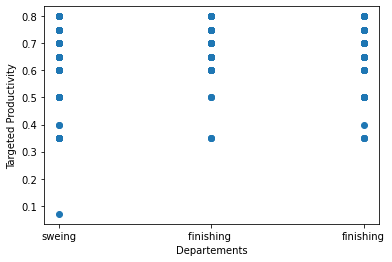

In [11]:
plt.scatter(train_df['department'], train_df['targeted_productivity'])
plt.ylabel('Targeted Productivity')
plt.xlabel('Departements')
plt.show()

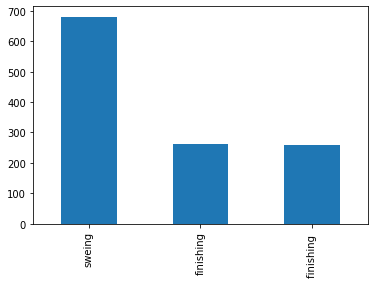

In [12]:
train_df['department'].value_counts().plot(kind='bar')

## Finding Correlation of actual_productivity with others dataframe columns

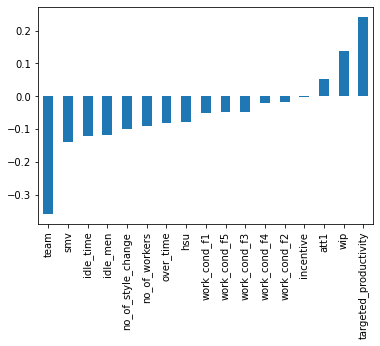

In [13]:
subsample_data = cin_subsample(train_df, 23)
subsample_data.corr()['actual_productivity'].sort_values()[:-1].plot.bar()

## Heatmap of Correlation

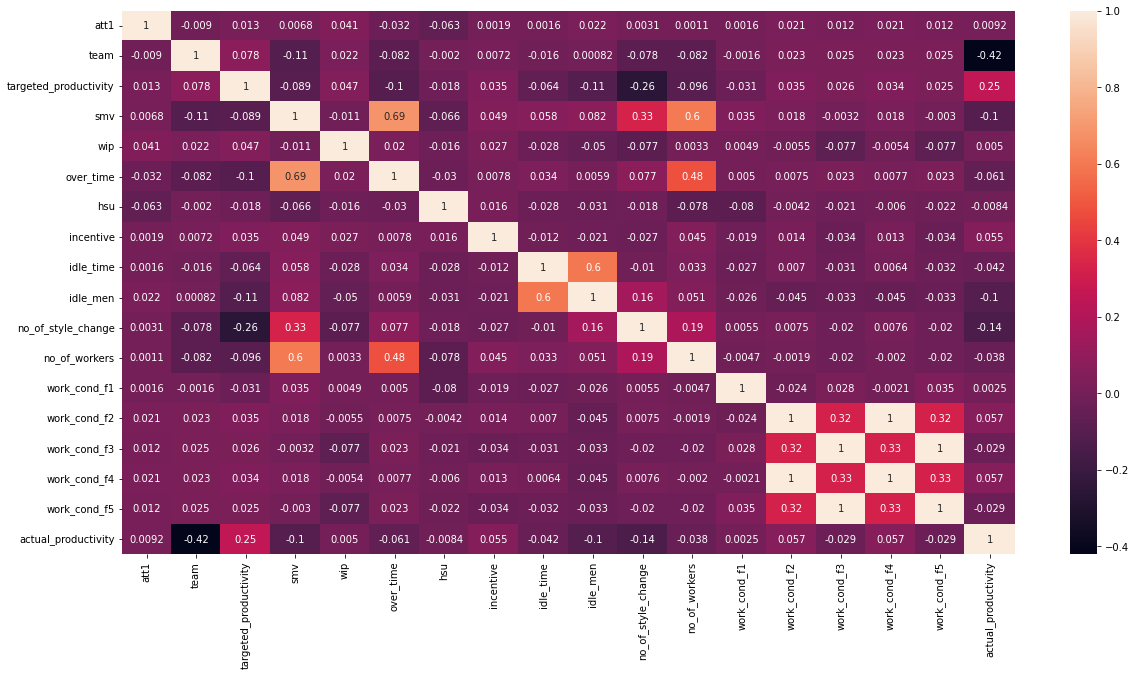

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(), annot=True)

## Pairplot

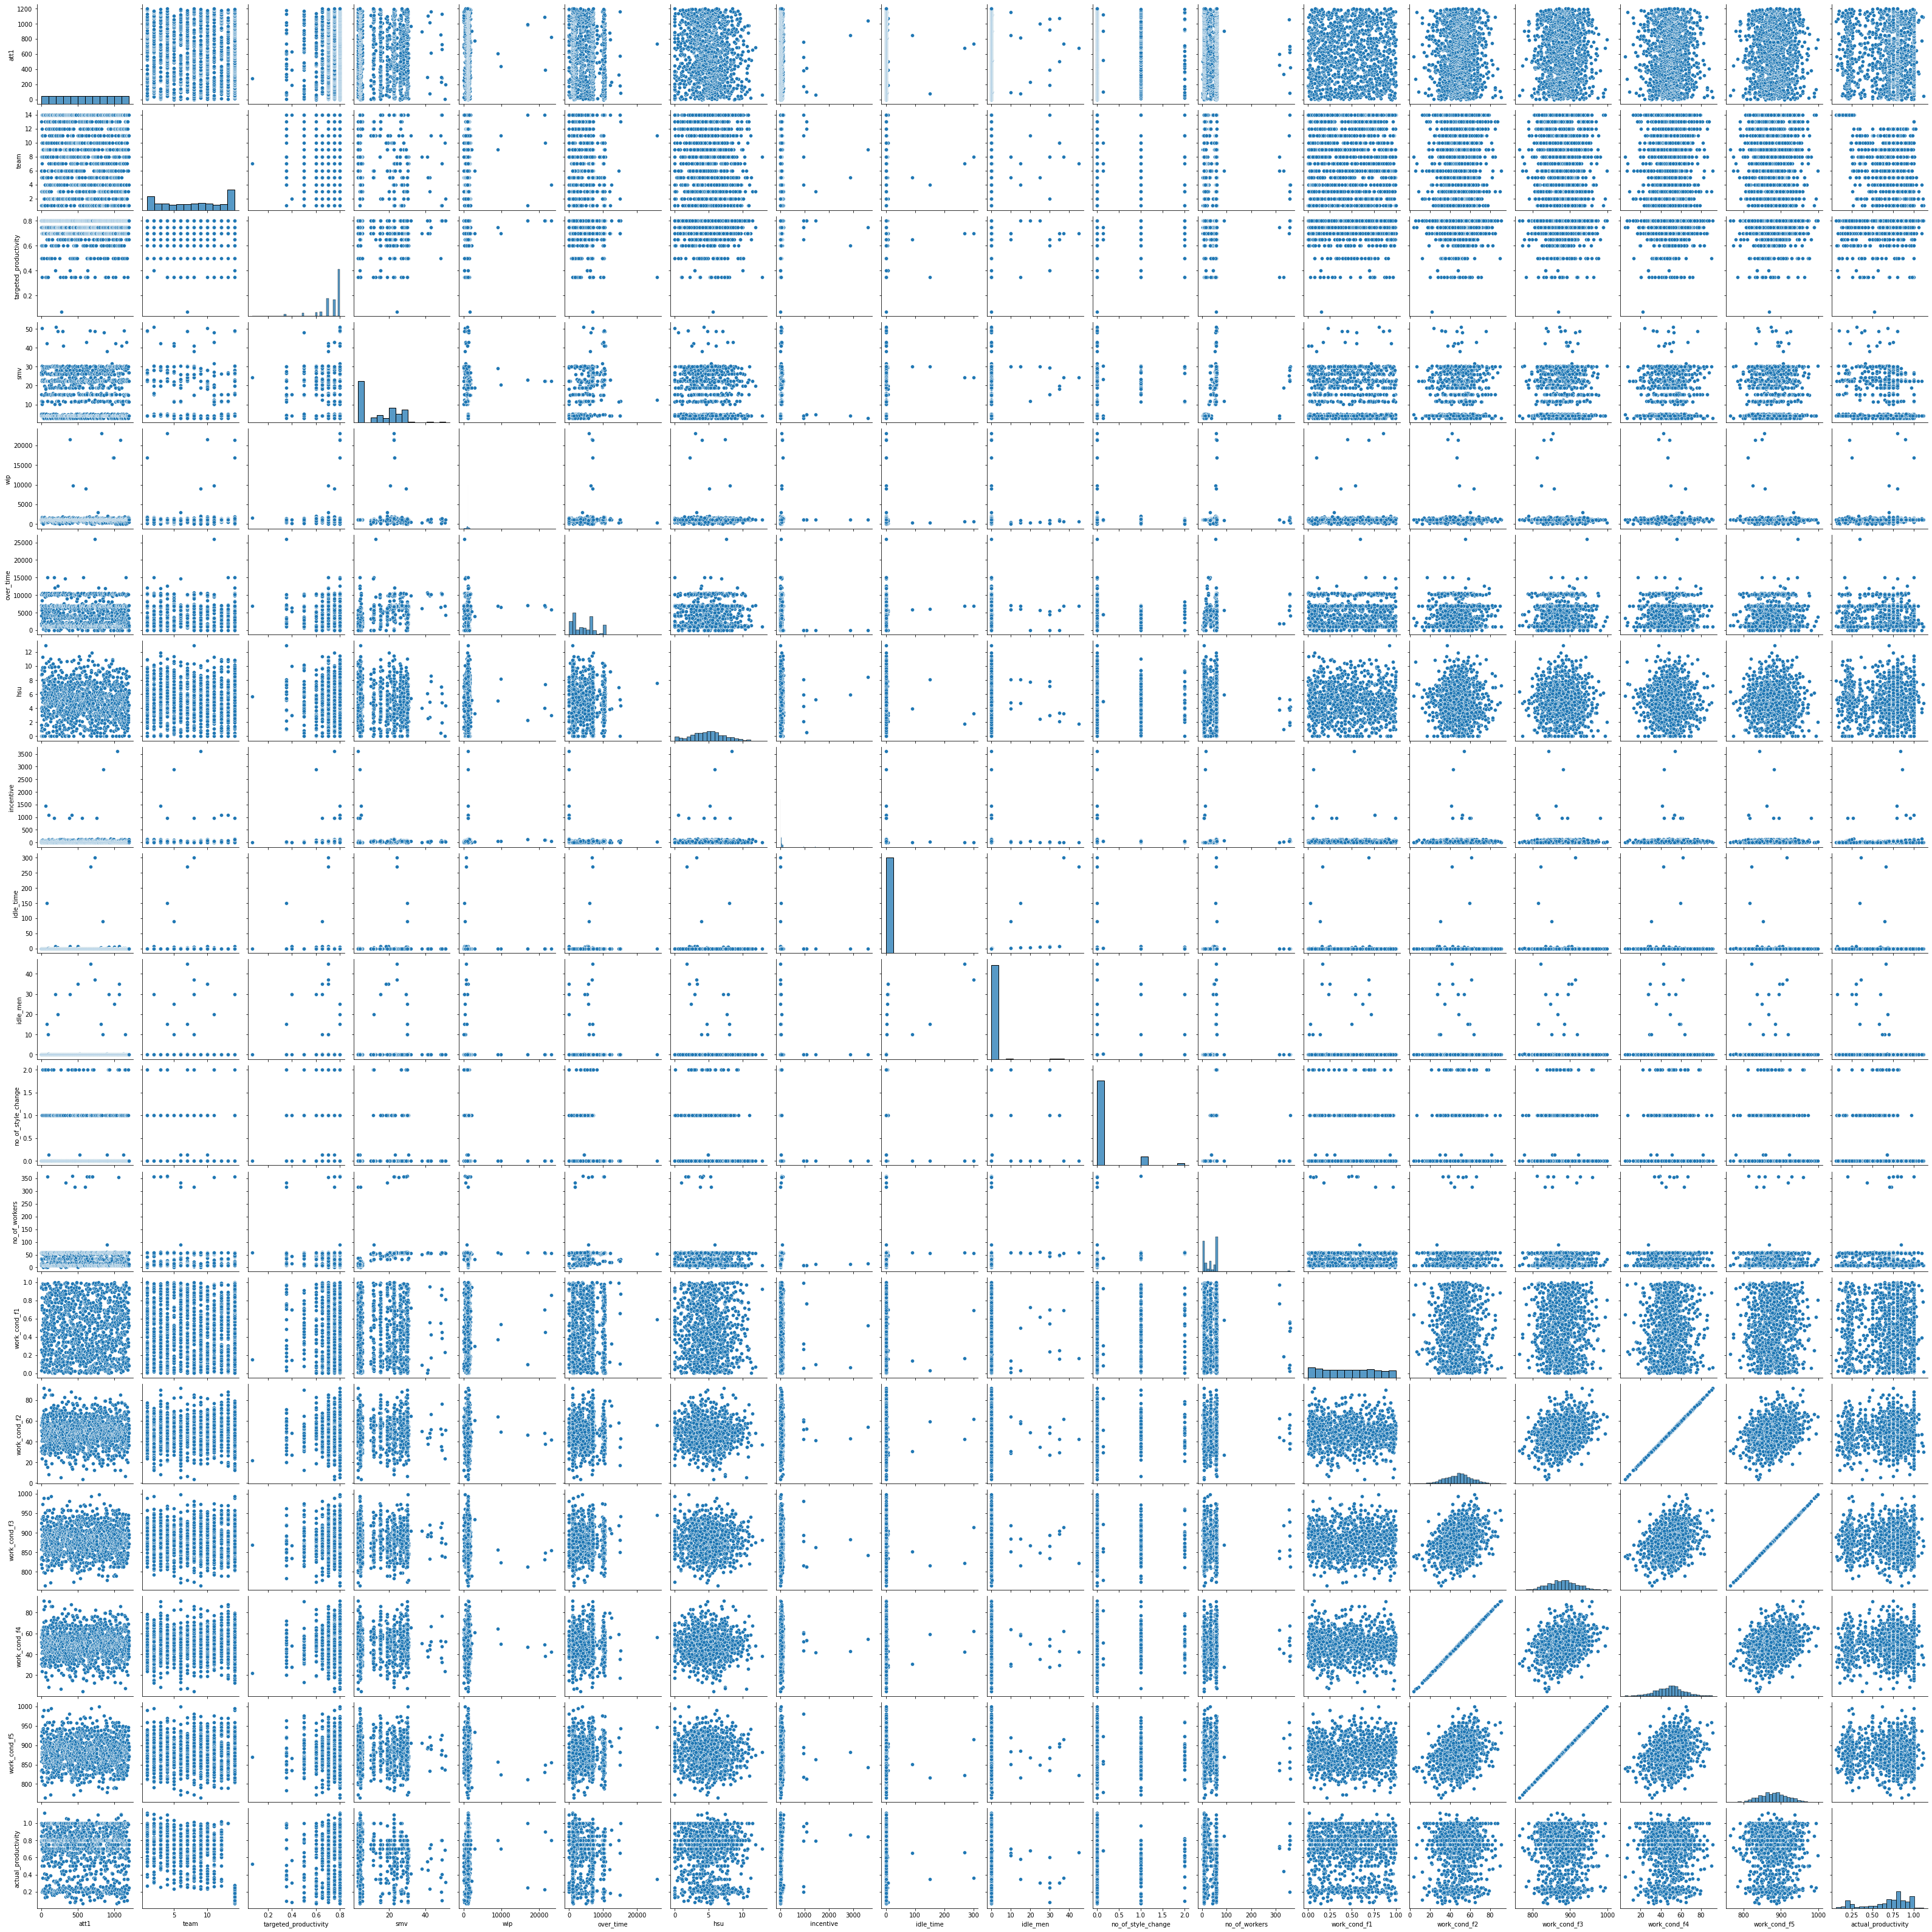

In [15]:
sns.pairplot(train_df)

## Checking for null values

In [16]:
train_df.isnull().sum()

att1                     0
date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
hsu                      0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
work_cond_f1             0
work_cond_f2             0
work_cond_f3             0
work_cond_f4             0
work_cond_f5             0
actual_productivity      0
dtype: int64

In [17]:
X = train_df.drop(['date','quarter','department','day','actual_productivity'], axis=1)
y = train_df[['actual_productivity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
# Apply regression model to our data
models = [LinearRegression, ElasticNet, Lasso, DecisionTreeRegressor, RandomForestRegressor]
mae_scores=[]
for model in models:
    reg = model()
    reg.fit(X,y)
    pred = reg.predict(X_test)
    err = mean_absolute_error(y_test, pred) ** .5
    mae_scores.append(err)
    print(f'MAE of {model.__name__} model is: {err}')
    print('*'*50)

MAE of LinearRegression model is: 0.4073189868631659
**************************************************
MAE of ElasticNet model is: 0.45154832909728715
**************************************************
MAE of Lasso model is: 0.45139138411894103
**************************************************
MAE of DecisionTreeRegressor model is: 8.376152293900674e-09
**************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MAE of RandomForestRegressor model is: 0.16167343611191862
**************************************************


In [19]:
mae_scores

[0.4073189868631659,
 0.45154832909728715,
 0.45139138411894103,
 8.376152293900674e-09,
 0.16167343611191862]

## Random Hyperparameter Grid

In [20]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [23]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [24]:
pred = rf_random.predict(X_test)
err = mean_absolute_error(y_test, pred) ** .5
mae_scores.append(err)
print(f'MAE Random Hyperparameter Grid of model is: {err}')

MAE Random Hyperparameter Grid of model is: 0.1777981422039205


In [25]:
mae_scores = np.array(mae_scores)
mae_scores

array([4.07318987e-01, 4.51548329e-01, 4.51391384e-01, 8.37615229e-09,
       1.61673436e-01, 1.77798142e-01])

## visualization of results


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 <a list of 6 Text major ticklabel objects>)

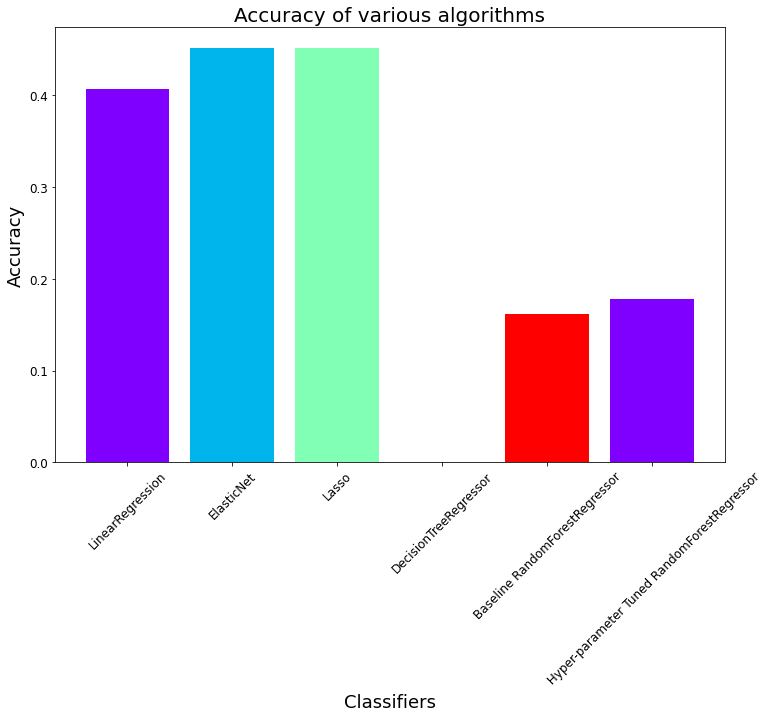

In [26]:
import matplotlib.cm as cm
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 5))
labels = ['LinearRegression', 'ElasticNet', 'Lasso', 'DecisionTreeRegressor', 'Baseline RandomForestRegressor', ' Hyper-parameter Tuned RandomForestRegressor']
plt.bar(labels,
 mae_scores[:6],
 color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)